<a href="https://colab.research.google.com/github/luisdiaz1997/DataScienceCourse/blob/master/Week_12_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[:, :,:, None] /255
x_test = x_test[:, :, :, None] /255

In [3]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_train_flat = x_train.reshape(-1, 28*28) 

In [5]:
x_train_flat.shape

(60000, 784)

#PCA (Principal Component Analysis) Review

In [6]:
'''
Z = dot(X,W) 60000x 32
X_restored = dot(Z, W.T)
'''

'\nZ = dot(X,W) 60000x 32\nX_restored = dot(Z, W.T)\n'

In [0]:
from sklearn import decomposition

PCA_model = decomposition.PCA(n_components = 2)

In [0]:
PCA_data = PCA_model.fit_transform(x_train_flat)

In [9]:
PCA_data.shape

(60000, 2)

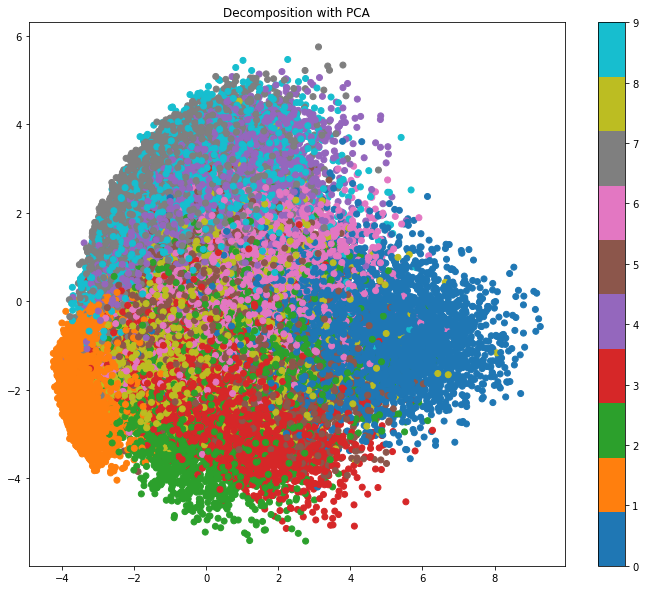

In [10]:
plt.figure(1, figsize= (12, 10))
plt.scatter(PCA_data[:, 0], PCA_data[:, 1], c = y_train, cmap = 'tab10')
plt.title('Decomposition with PCA')
plt.colorbar()

#MDS (Multidimesional Scaling)

In [0]:
from sklearn.manifold import MDS

MDS_model = MDS(n_components = 2)


In [0]:
MDS_data = MDS_model.fit_transform(x_train_flat[::50])

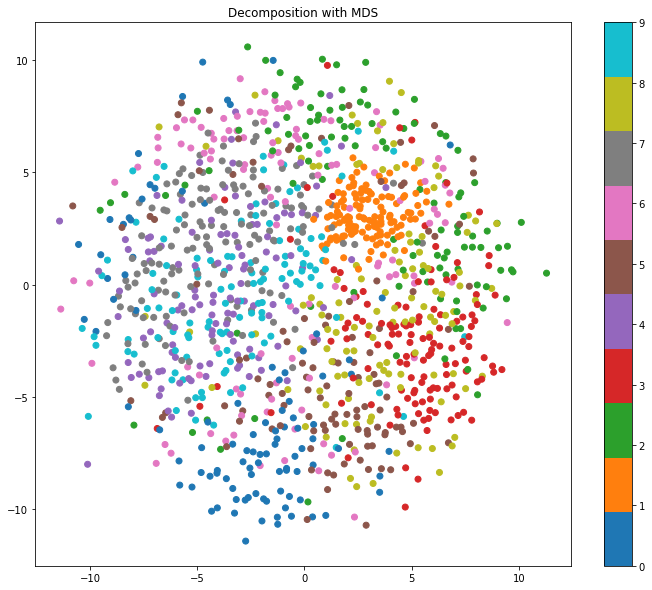

In [13]:
plt.figure(2, figsize= (12, 10))
plt.scatter(MDS_data[:, 0], MDS_data[:, 1], c = y_train[::50], cmap = 'tab10')
plt.title('Decomposition with MDS')
plt.colorbar()

#TSNE

In [0]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(n_components = 2)

In [0]:
TSNE_data = TSNE_model.fit_transform(x_train_flat[::50])

In [16]:
TSNE_data.shape

(1200, 2)

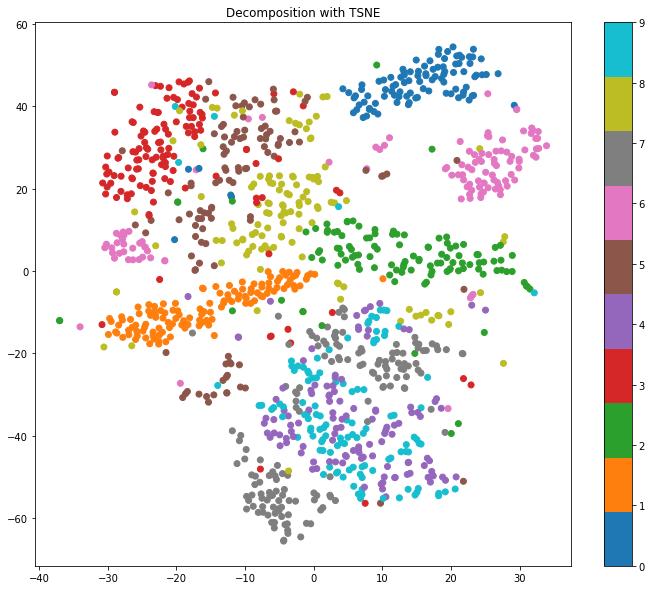

In [17]:
plt.figure(3, figsize= (12, 10))
plt.scatter(TSNE_data[:, 0], TSNE_data[:, 1], c = y_train[::50], cmap = 'tab10')
plt.title('Decomposition with TSNE')
plt.colorbar()

# Autoencoders

In [0]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Conv2D, MaxPooling2D, Flatten, Reshape, Conv2DTranspose, UpSampling2D

In [0]:
encoder = Sequential([
                      Flatten(input_shape = (28, 28, 1)),
                      Dense(128),
                      Activation('relu'),
                      Dense(96),
                      Activation('relu'),
                      Dense(48),
                      Activation('relu'),
                      Dense(3),
                      Activation('tanh')
])

In [20]:
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
activation_2 (Activation)    (None, 96)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 48)                4656      
_________________________________________________________________
activation_3 (Activation)    (None, 48)               

In [0]:
decoder = Sequential([
                      Dense(48, input_shape= (3,)),
                      Activation('relu'),
                      Dense(96),
                      Activation('relu'),
                      Dense(128),
                      Activation('relu'),
                      Dense(28*28),
                      Activation('relu'),
                      Reshape(target_shape= (28, 28, 1))
])

In [22]:
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 48)                192       
_________________________________________________________________
activation_5 (Activation)    (None, 48)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 96)                4704      
_________________________________________________________________
activation_6 (Activation)    (None, 96)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               12416     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)              

In [0]:
autoencoder = Sequential([
                          encoder,
                          decoder
])

In [24]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 3)                 117667    
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28, 1)         118448    
Total params: 236,115
Trainable params: 236,115
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer= 'adam', loss = 'MSE', metrics= ['accuracy'])

In [26]:
autoencoder.fit(x_train, x_train, batch_size= 32, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.0490 - accuracy: 0.8011
Epoch 2/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.0397 - accuracy: 0.8025
Epoch 3/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.0369 - accuracy: 0.8028
Epoch 4/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.0358 - accuracy: 0.8030
Epoch 5/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.0350 - accuracy: 0.8032


In [0]:
x_test_predict = autoencoder.predict(x_test)

In [0]:
x_test_embed = encoder.predict(x_test)

In [29]:
x_test_embed.shape

(10000, 3)

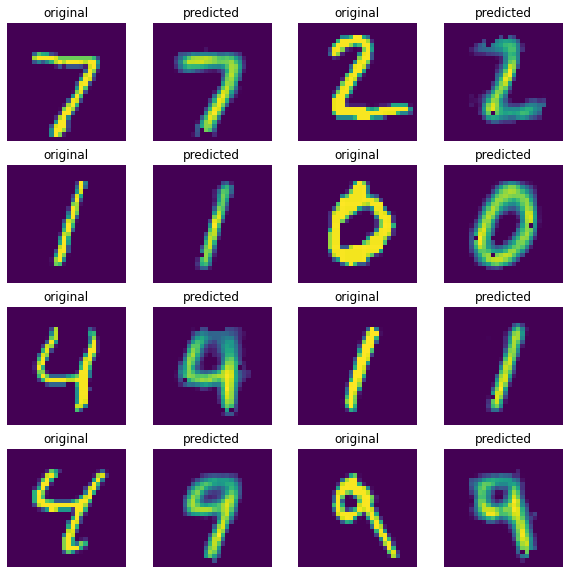

In [30]:
plt.figure(4, figsize= (10, 10))

for i in range(8):
  plt.subplot(4, 4, (2*i) + 1)
  plt.imshow(x_test[i, :, :, 0])
  plt.title('original')
  plt.axis('off')
  plt.subplot(4, 4, (2*i) + 2)
  plt.imshow(x_test_predict[i, :, :, 0])
  plt.title('predicted')
  plt.axis('off')

In [0]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(data = x_test_embed, columns = ['PC'+ str(i + 1) for i in range(x_test_embed.shape[1])])
df['value'] = y_test

In [32]:
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color='value')
fig.show()

#Covolutional Autoencoder

In [0]:
conv_encoder = Sequential([
                           Conv2D(32, kernel_size=(3,3), padding= 'same', input_shape= (28, 28, 1)),
                           BatchNormalization(),
                           Activation('relu'),
                           MaxPooling2D(), #14x 14x 32
                      

                           Conv2D(64, kernel_size=(3,3), padding= 'valid'),
                           BatchNormalization(),
                           Activation('relu'),
                           MaxPooling2D(), #6 x 6 x 64

                           Conv2D(16, kernel_size=(3,3), padding= 'same'),
                           BatchNormalization(),
                           Activation('relu'),
                           MaxPooling2D(), #3x3x 16

                           Conv2D(3, kernel_size=(3,3), padding= 'valid'),
                           BatchNormalization() #1x1x 3
                           ])

In [66]:
conv_encoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_28 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_24 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
activation_29 (Activation)   (None, 12, 12, 64)      

In [0]:
conv_decoder = Sequential([
                           Conv2DTranspose(32, kernel_size=(3,3), padding= 'valid', input_shape= (1, 1, 3)),
                           #3X 3 X 16
                           BatchNormalization(),
                           Activation('relu'),
                           UpSampling2D(),#6 X 6 X 32

                           
                           Conv2DTranspose(64, kernel_size=(3,3), padding= 'same'),
                           BatchNormalization(),
                           Activation('relu'),
                           UpSampling2D(), #12 x 12x 64


                           Conv2DTranspose(16, kernel_size=(3,3), padding= 'valid'), #14 x 14x 16
                           BatchNormalization(),
                           Activation('relu'),
                           UpSampling2D(), #28 x 28x 16

                           Conv2DTranspose(1, kernel_size=(3,3), padding= 'same'), #28 x 28x 1
                           ])

In [93]:
conv_decoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_21 (Conv2DT (None, 3, 3, 32)          896       
_________________________________________________________________
batch_normalization_36 (Batc (None, 3, 3, 32)          128       
_________________________________________________________________
activation_40 (Activation)   (None, 3, 3, 32)          0         
_________________________________________________________________
up_sampling2d_16 (UpSampling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_transpose_22 (Conv2DT (None, 6, 6, 64)          18496     
_________________________________________________________________
batch_normalization_37 (Batc (None, 6, 6, 64)          256       
_________________________________________________________________
activation_41 (Activation)   (None, 6, 6, 64)        

In [0]:
conv_autoencoder = Sequential([conv_encoder, conv_decoder])

In [95]:
conv_autoencoder.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 1, 1, 3)           28943     
_________________________________________________________________
sequential_18 (Sequential)   (None, 28, 28, 1)         29217     
Total params: 58,160
Trainable params: 57,706
Non-trainable params: 454
_________________________________________________________________


In [0]:
conv_autoencoder.compile(optimizer= 'adam', loss = 'MSE', metrics = ['accuracy'])

In [97]:
conv_autoencoder.fit(x_train, x_train, batch_size= 32, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 34s 566us/step - loss: 0.0491 - accuracy: 0.7980
Epoch 2/5
60000/60000 [==============================] - 32s 538us/step - loss: 0.0419 - accuracy: 0.8003
Epoch 3/5
60000/60000 [==============================] - 32s 537us/step - loss: 0.0409 - accuracy: 0.8005
Epoch 4/5
60000/60000 [==============================] - 32s 537us/step - loss: 0.0403 - accuracy: 0.8006
Epoch 5/5
60000/60000 [==============================] - 32s 537us/step - loss: 0.0399 - accuracy: 0.8007


In [0]:
x_test_conv_predict = conv_autoencoder.predict(x_test)

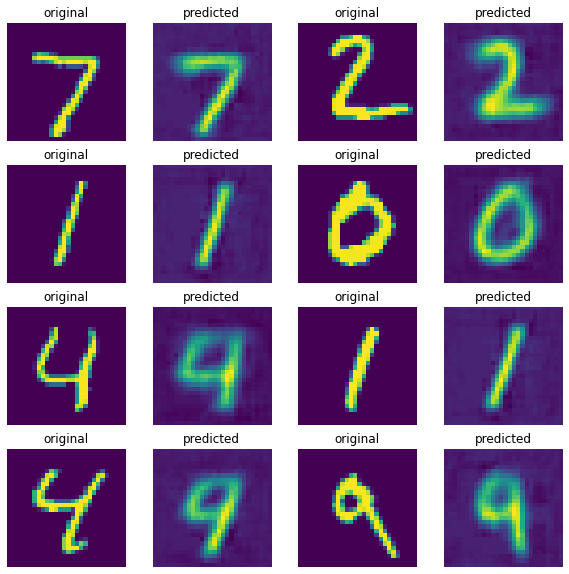

In [99]:
plt.figure(5, figsize= (10, 10))

for i in range(8):
  plt.subplot(4, 4, (2*i) + 1)
  plt.imshow(x_test[i, :, :, 0])
  plt.title('original')
  plt.axis('off')
  plt.subplot(4, 4, (2*i) + 2)
  plt.imshow(x_test_conv_predict[i, :, :, 0])
  plt.title('predicted')
  plt.axis('off')

In [0]:
x_test_conv_embed = conv_encoder.predict(x_test)

In [0]:
x_test_conv_embed = x_test_conv_embed.reshape(-1, 3)

In [0]:
df_conv = pd.DataFrame(data = x_test_conv_embed, columns = ['PC'+ str(i + 1) for i in range(x_test_conv_embed.shape[1])])
df_conv['value'] = y_test

In [103]:
fig = px.scatter_3d(df_conv, x='PC1', y='PC2', z='PC3',
              color='value')
fig.show()